In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

#Defautl configurations for the plots
plt.close('all')
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams["figure.dpi"] = 100
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.sans-serif'] = ['cmr10']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# Input and output paths    
path_load = os.getcwd() + '/data/loads/'
path_xlsx = os.getcwd() + '/data/spreadsheets/'
path_dss = os.getcwd() + '/data/dss_files/'	
output_csv = os.getcwd() + '/data/output/csv/'
output_img = os.getcwd() + '/data/output/img/'
path_generators = os.getcwd() + '/data/generators_profiles/'


In [3]:
# Read the data
kind = 'Simple'
dss = '5Nodeckt'
# dss = '5Node'
bess_bus = 'bus001'
if  not kind == 'NoOperation':
    load = pd.read_csv(output_csv + 'load/' f'Load_{kind}_{bess_bus}_year_{dss}.csv')
    generation = pd.read_csv(output_csv + 'generation/' f'Generation_{kind}_{bess_bus}_year_{dss}.csv')
    demand = pd.read_csv(output_csv + 'demand/' f'Demand_{kind}_{bess_bus}_year_{dss}.csv')
    bess_df = pd.read_csv(output_csv + 'bess/' f'BessPowers_{kind}_{bess_bus}_year_{dss}.csv')
else:
    load = pd.read_csv(output_csv + 'load/' f'Load_{kind}_year_{dss}.csv')
    generation = pd.read_csv(output_csv + 'generation/' f'Generation_{kind}_year_{dss}.csv')
    demand = pd.read_csv(output_csv + 'demand/' f'Demand_{kind}_year_{dss}.csv')

# Read the file and

date_ini = '2012-07-07 06:00'
date_end = '2012-07-08 06:00'
interval = 30
time = pd.date_range(date_ini, date_end, freq=str(interval) + 'T')

C:\Users\joao9\AppData\Local\Temp\ipykernel_3300\1787292797.py:21: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time = pd.date_range(date_ini, date_end, freq=str(interval) + 'T')


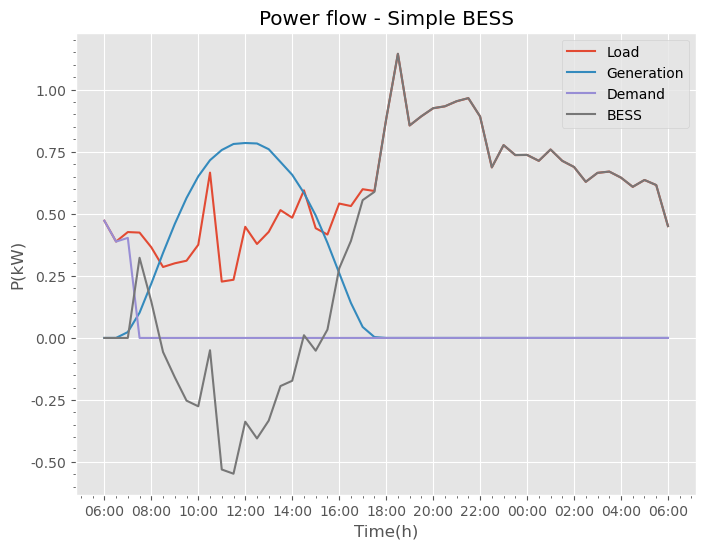

In [4]:

if not kind == 'NoOperation':
    #Extract the timestep from power_df
    load = load['P(kW)'][:len(time)]
    generation = generation['P(kW)'][:len(time)]
    demand_bess = demand['P(kW)'][:len(time)]
    bess_power = bess_df.loc[:, 'P(kW)'][:len(time)]

    #Plot the data
    fig = plt.figure(figsize=(8,6))
    plt.title(f'Power flow - {kind} BESS')
    plt.plot(time, load, label='Load')
    plt.plot(time, generation, label='Generation')
    plt.plot(time, demand_bess, label='Demand')
    plt.plot(time, bess_power, label='BESS')
    plt.legend()
    plt.xlabel('Time(h)')
    plt.ylabel('P(kW)')
    plt.grid(True)

    # Format the x axis to display readable times
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
    plt.minorticks_on()

else:
    #Extract the timestep from power_df
    load = load['P(kW)'][:len(time)]
    generation = generation['P(kW)'][:len(time)]
    demand_bess = demand['P(kW)'][:len(time)]

    #Plot the data
    fig = plt.figure(figsize=(8,6))
    plt.title(f'Power flow - {kind} BESS')
    plt.plot(time, load, label='Load')
    plt.plot(time, generation, label='Generation')
    plt.plot(time, demand_bess, label='Demand')
    plt.legend()
    plt.xlabel('Time(h)')
    plt.ylabel('P(kW)')
    plt.grid(True)

    # Format the x axis to display readable times
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
    plt.minorticks_on()
# save_fig(fig,'power_bess_smoothing',output_img)




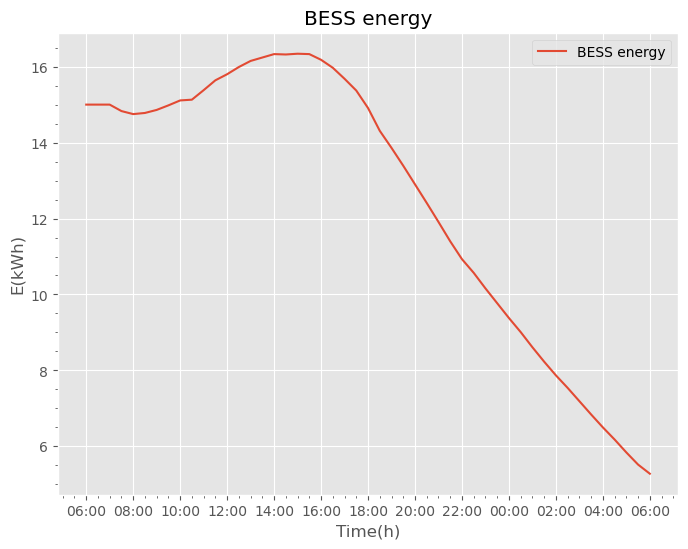

In [5]:
if not kind == 'NoOperation':
    bes_energy = bess_df.loc[:, 'E(kWh)'][:len(time)]

    #Plot the data
    fig = plt.figure(figsize=(8,6))
    plt.title('BESS energy')
    plt.plot(time, bes_energy, label='BESS energy')
    plt.legend()
    plt.xlabel('Time(h)')
    plt.ylabel('E(kWh)')
    plt.grid(True)

    # Format the x axis to display readable times
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
    plt.minorticks_on()

    # save_fig(fig,'bess_energy_simple',output_img)

In [6]:
if not kind == 'NoOperation':
    power_no_bess = pd.read_csv(output_csv + 'demand/' f'demand_NoOperation_year{dss}.csv')
    demand_no_bess = power_no_bess['P(kW)'].values[:len(time)]

    #Plot the data
    fig = plt.figure(figsize=(8,6))
    plt.title('Power flow comparison - Simple BESS')
    plt.plot(time, load, label='Load')
    plt.plot(time, generation, label='Generation')
    plt.plot(time, demand_no_bess, label='Demand - No BESS')
    plt.plot(time, demand_bess, label='Demand - BESS')
    plt.plot(time, bess_power, label='BESS power')
    plt.legend()
    plt.xlabel('Time(h)')
    plt.ylabel('P(kW)')
    plt.grid(True)

    # # Format the x axis to display readable times
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
    plt.minorticks_on()

    # save_fig(fig,'power_compar_smoothing',output_img)



FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\joao9\\GitHub\\GridFlexPy/data/output/csv/demand/demand_NoOperation_year5Nodeckt.csv'